# Convert a source in partially coherent

We 

In [3]:
from diffractio import np, plt
from diffractio import mm, um
from diffractio.diffractio import Diffractio


In [4]:
x0 = np.linspace(-150 * um, 150 * um, 256)
y0 = np.linspace(-150 * um, 150 * um, 256)
z0 = np.linspace(0, 100*um, 512)
wavelength = 2 * um
k = 2 * np.pi / wavelength


frame_xy = dict(x=x0, y=y0, wavelength=wavelength)
frame_xyz = dict(x=x0, y=y0, z=z0, wavelength=wavelength)

In [11]:
# Creating a standard scalar source
u0 = Diffractio('scalar', 'source', x=x0, y=y0,wavelength=wavelength)
u0.plane_wave()
u0.pupil(radius = 50*um)

Mean roughness    : 0.000 loops
Standard deviation: 0.160 loops


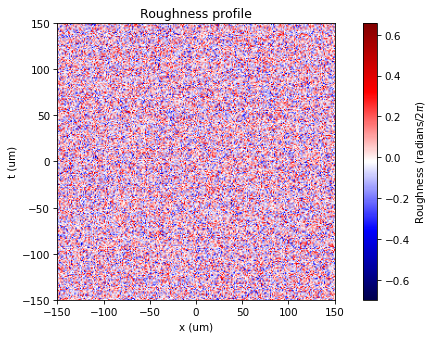

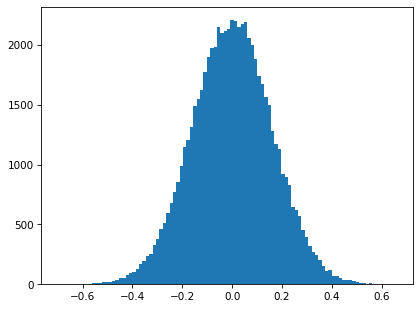

In [6]:
u1 = u0.duplicate()

# Applying partial coherence to the scalar source for converting it to a scalar source with partial coherence
u1.partial_coherence(lc=wavelength/10, s=wavelength/2, has_draw=True, verbose=True)

**Results for the coherent source**


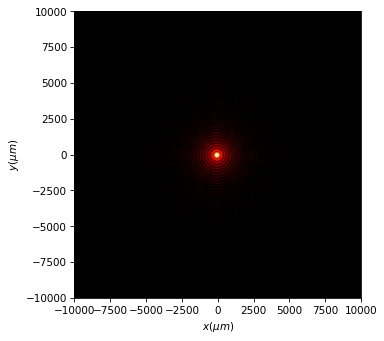

In [7]:
uz = u0.CZT(xout = np.linspace(-10*mm, 10*mm, 512),
            yout = np.linspace(-10*mm, 10*mm, 512),
            z= 10*mm )

uz.draw(logarithm=1e5)

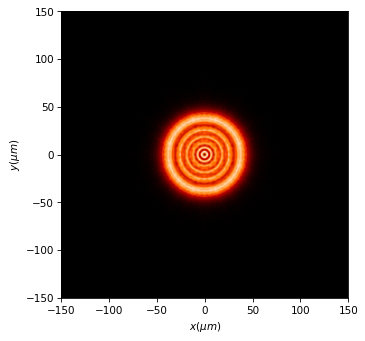

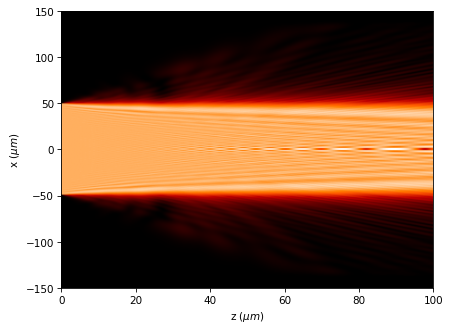

In [ ]:
uxyz = Diffractio('scalar', 'field', **frame_xyz)
uxyz.incident_field(u0)
uxyz.WPM()

uxy = uxyz.to_Scalar_field_XY(z0=2*mm)
uxy.draw(logarithm=1e0)

uxz = uxyz.to_Scalar_field_XZ(y0=0*um)
uxz.draw(kind="intensity", logarithm = 1e2)

**Results for the partially coherent source**


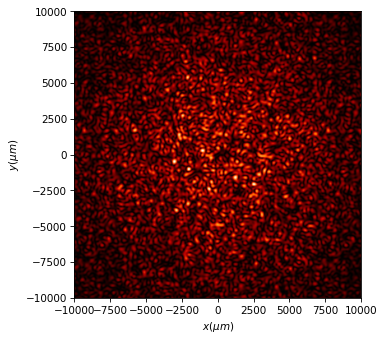

In [12]:
uz = u1.CZT(xout = np.linspace(-10*mm, 10*mm, 512),
            yout = np.linspace(-10*mm, 10*mm, 512),
            z= 10*mm )

uz.draw(logarithm=1e5)

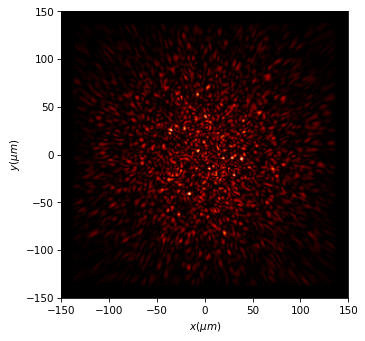

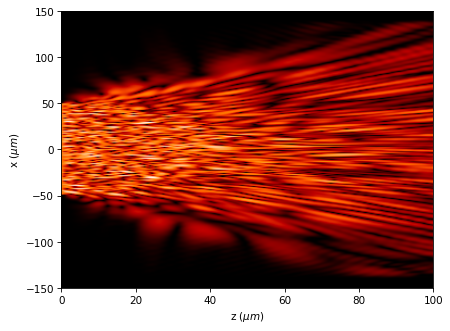

In [13]:
uxyz = Diffractio('scalar', 'field', **frame_xyz)
uxyz.incident_field(u1)
uxyz.WPM()

uxy = uxyz.to_Scalar_field_XY(z0=2*mm)
uxy.draw(logarithm=1e0)

uxz = uxyz.to_Scalar_field_XZ(y0=0*um)
uxz.draw(kind="intensity", logarithm = 1e2)